In [1]:
import rpSBML
import rpGraph
import rpDraw
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#rpsbml = rpSBML.rpSBML('test', path='rp_1_3.sbml.xml')
#BUG BUG in the ordering of reactions
#rpsbml = rpSBML.rpSBML('test', path='/Users/melchior/Downloads/Galaxy1442-[FBA]/rp_3_8.sbml.xml')
#rpsbml = rpSBML.rpSBML('test', path='/Users/melchior/Downloads/Galaxy1442-[FBA]/rp_18_1.sbml.xml')
#rpsbml = rpSBML.rpSBML('test', path='/Users/melchior/Downloads/Galaxy1442-[FBA]/rp_16_1.sbml.xml')


rpsbml = rpSBML.rpSBML('test', path='/Users/melchior/Downloads/rpglobalscore_101/rp_5_4.sbml.xml')

In [3]:
pathway = [{'reactants_inchi': ['InChI=1S/C10H13N5O3/c11-9-8-10(13-3-12-9)15(4-14-8)7-1-5(17)6(2-16)18-7/h3-7,16-17H,1-2H2,(H2,11,12,13)/t5-,6+,7+/m0/s1'],
            'products_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C6H6O4/c7-5(8)3-1-2-4-6(9)10/h1-4H,(H,7,8)(H,9,10)/b3-1+,4-2+', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': ['NADP', 'ATP'], 
            'cofactor_products': ['ADP']
           },
      
           {'reactants_inchi': ['InChI=1S/C6H6O2/c7-5-3-1-2-4-6(5)8/h1-4,7-8H', 'InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           },
        
           {'reactants_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'products_inchi': ['InChI=1S/C3H6O/c1-3(2)4/h1-2H3/i1+1,2+1', 'InChI=1S/C3H5O.Zn/c1-3(2)4;/h1H2,2H3;/q-1;'],
            'cofactor_reactants': [], 
            'cofactor_products': []
           }
           
          ]

In [4]:
rpgraph = rpGraph.rpGraph(rpsbml)
rpdraw = rpDraw.rpDraw()

In [9]:
[i for i in list(rpgraph.G.nodes) if 'TARGET' in i][0]

'TARGET_0000000001__64__MNXC3'

In [6]:
newG, pos = rpdraw._hierarchy_pos(rpgraph.G, 'TARGET_0000000001__64__MNXC3', plot_only_central=True, filter_cofactors=True)

In [7]:
pos

{'TARGET_0000000001__64__MNXC3': (0.5, 0),
 'RP1': (0.5, -0.2),
 'CMPD_0000000001__64__MNXC3': (0.16666666666666666, -0.4),
 'RP3': (0.5, -0.6000000000000001),
 'CMPD_0000000010__64__MNXC3': (0.5, -0.8),
 'RP4': (0.5, -1.0),
 'MNXM89557__64__MNXC3': (0.5, -1.2),
 'CMPD_0000000003__64__MNXC3': (0.5, -0.4),
 'RP2': (0.5, -0.6000000000000001),
 'MNXM23__64__MNXC3': (0.8333333333333333, -0.4)}

In [26]:
pathway = []
inchi_pathway = []
ordered_y = sorted(list(set([pos[i][1] for i in pos])))
for layer_y_loc in ordered_y:
    ordered_x = sorted(list(set([pos[i][0] for i in pos if pos[i][1]==layer_y_loc])))
    reaction = []
    inchi = []
    for layer_x_loc in ordered_x:
        for node_id in pos:
            if pos[node_id][1]==layer_y_loc and pos[node_id][0]==layer_x_loc:
                n = newG.nodes.get(node_id)
                try:
                    inchi.append(newG.nodes.get(node_id)['brsynth']['inchi'])
                except KeyError:
                    pass
                reaction.append(node_id)
                break
    if all([newG.nodes.get(i)['type']=='reaction' for i in reaction]):
        continue
    pathway.append(reaction)
    inchi_pathway.append(inchi)

In [27]:
pathway

[['MNXM89557__64__MNXC3'],
 ['CMPD_0000000010__64__MNXC3'],
 ['CMPD_0000000001__64__MNXC3',
  'CMPD_0000000003__64__MNXC3',
  'MNXM23__64__MNXC3'],
 ['TARGET_0000000001__64__MNXC3']]

In [28]:
inchi_pathway

[['InChI=1S/C5H9NO4/c6-3(5(9)10)1-2-4(7)8/h3H,1-2,6H2,(H,7,8)(H,9,10)/p-1/t3-/m0/s1'],
 ['InChI=1S/C4H9NO2/c5-3-1-2-4(6)7/h1-3,5H2,(H,6,7)'],
 ['InChI=1S/C4H9NO/c5-3-1-2-4-6/h4H,1-3,5H2',
  'InChI=1S/C3H7NO2/c1-2(4)3(5)6/h2H,4H2,1H3,(H,5,6)',
  'InChI=1S/C3H4O3/c1-2(4)3(5)6/h1H3,(H,5,6)/p-1'],
 ['InChI=1S/C4H12N2/c5-3-1-2-4-6/h1-6H2']]

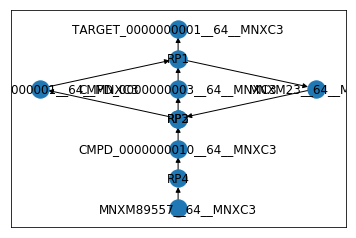

In [20]:
nx.draw_networkx(newG, pos=pos)

In [9]:
b, len_x, len_y = rpgraph._drawPathway(pathway, arrow_gap_size=50, react_arrow_size=30)
open('test_pathway.svg', 'w').write(b)

AttributeError: 'rpGraph' object has no attribute '_drawPathway'